# Author: Abdullah Moosa 03/11/2024

#### This code uses the clustering technique Agglomerative Hierarchical Clustering, which is a popular form of hierarchical clustering that groups data points based on their similarity. this works  by treating each data point as an individual cluster. It then repeatedly merges the closest pairs of clusters based on the Euclidean distance, until all points are merged into a single cluster. The output is a dendrogram—a tree-like structure—that visually represents the merging process and allows for easy interpretation of the hierarchical relationships between clusters. This technique is particularly useful for uncovering nested groupings within data and analyzing the structure of complex datasets.

[A. Kassambara, “Agglomerative Hierarchical Clustering,” Datanovia. https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/]

## Importing Libraries 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


## Dataset loading and set up

In [168]:
file_path = r'Z:\\coursework\\dataset\\cancer patient data sets.csv'
df = pd.read_csv(file_path)
true_labels = df['Level']
df_numerical = df.drop(['index', 'Patient Id', 'Level'], axis=1)


The true label of the class "level" is extracted from the coloumn which could allow for comparing the clustering algorithm's accuracy Next, the DataFrame is created by dropping non-numeric and irrelevant columns (index, Patient Id, and Level). Removing these columns is essential for clustering since non-numeric columns can't be directly used in  clustering.

## Standardizing

In [169]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)


The features are standardized using StandardScaler Class to ensure each feature contributes equally to distance calculations. This creates a dataset where all features have a mean of 0 and a standard deviation of 1.

## Evaluating best cluster Number

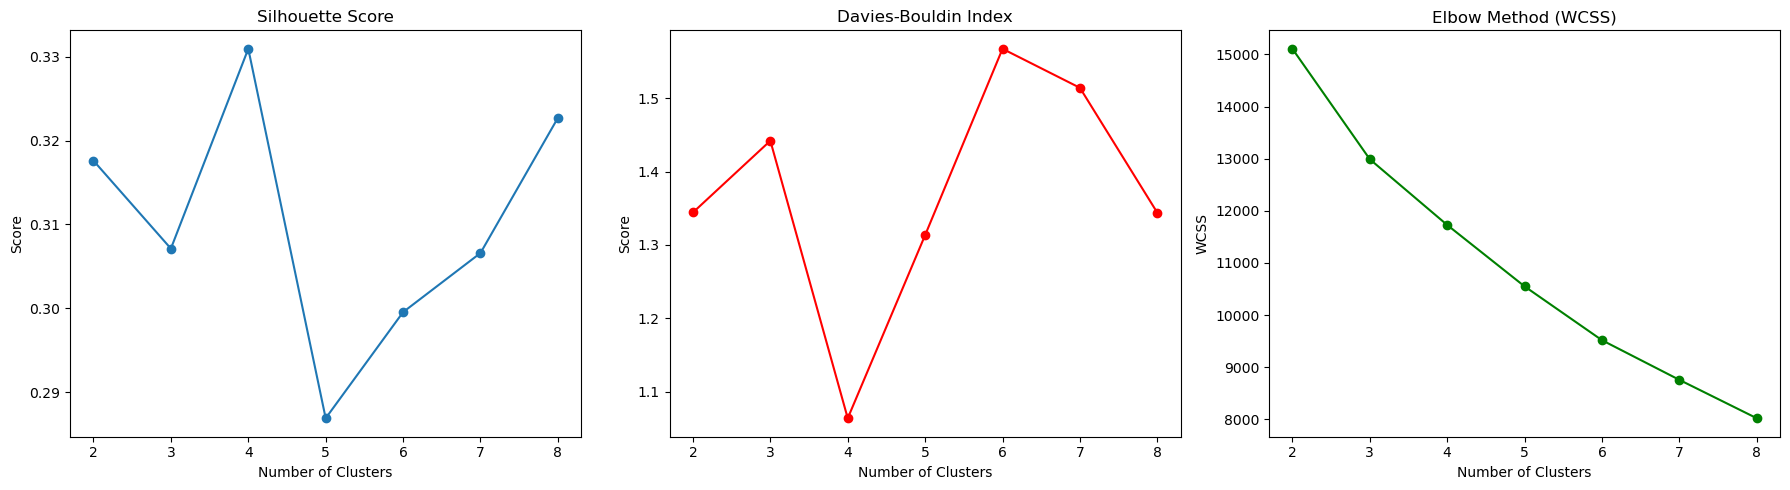

Optimal number of clusters based on Silhouette Score: 4
Best Silhouette Score: 0.3309
Optimal number of clusters based on Davies-Bouldin Index: 4
Best Davies-Bouldin Index: 1.0639


In [170]:
silhouette_scores = []
davies_bouldin_scores = []
wcss = []
cluster_range = range(2, 9)

for n_clusters in cluster_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglomerative.fit_predict(df_scaled)

    cluster_centers = np.array([df_scaled[labels == i].mean(axis=0) for i in range(n_clusters)])
    distances = np.linalg.norm(df_scaled - cluster_centers[labels], axis=1)
    wcss.append(np.sum(distances ** 2))
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, labels))


plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")

plt.subplot(1, 3, 3)
plt.plot(cluster_range, wcss, marker='o', color='green')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.tight_layout()
plt.show()


optimal_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters_silhouette}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")
optimal_clusters_db = cluster_range[np.argmin(davies_bouldin_scores)]
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_clusters_db}")
print(f"Best Davies-Bouldin Index: {min(davies_bouldin_scores):.4f}")



The code above evaluates different numbers of clusters to find the best optimal number of clusters that fits this dataset by applying agglomerative Hierarchical clustering, the value metrics shown above in the graphs are silhoutte score, Davies-Bouldin Index and WCSS(elbow method). It is shown that the cluster number 4 is the best because:

** It has the highest silhoutte score, which shows that the values are seperated well so it has well defined clusters


** It has the lowest Davies-Bouldin Index , which shows that the clusters are compact and seperated


** ALthough WCSS or the elbow method is not showing defined results we can see that cluster number 4 forms the steepest gradient descent , which shows that the clusters are not improving further beyond

## Apply Agglomerative Clustering for 4 clusters

In [171]:
optimal_clusters = 4
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
final_labels = agglomerative.fit_predict(df_scaled)
df['Cluster'] = final_labels
df[['Cluster']].head(10)

,Cluster
0,0
1,0
2,1
3,2
4,2
5,1
6,0
7,0
8,2
9,0


The code block above uses the optimal cluster number (4) identified in the previous analysis to perform agglomerative hierarchical clustering on the dataset. The clustering labels are assigned to each data point and stored in a new column, Cluster, within the DataFrame.

## Dendogram Visualization

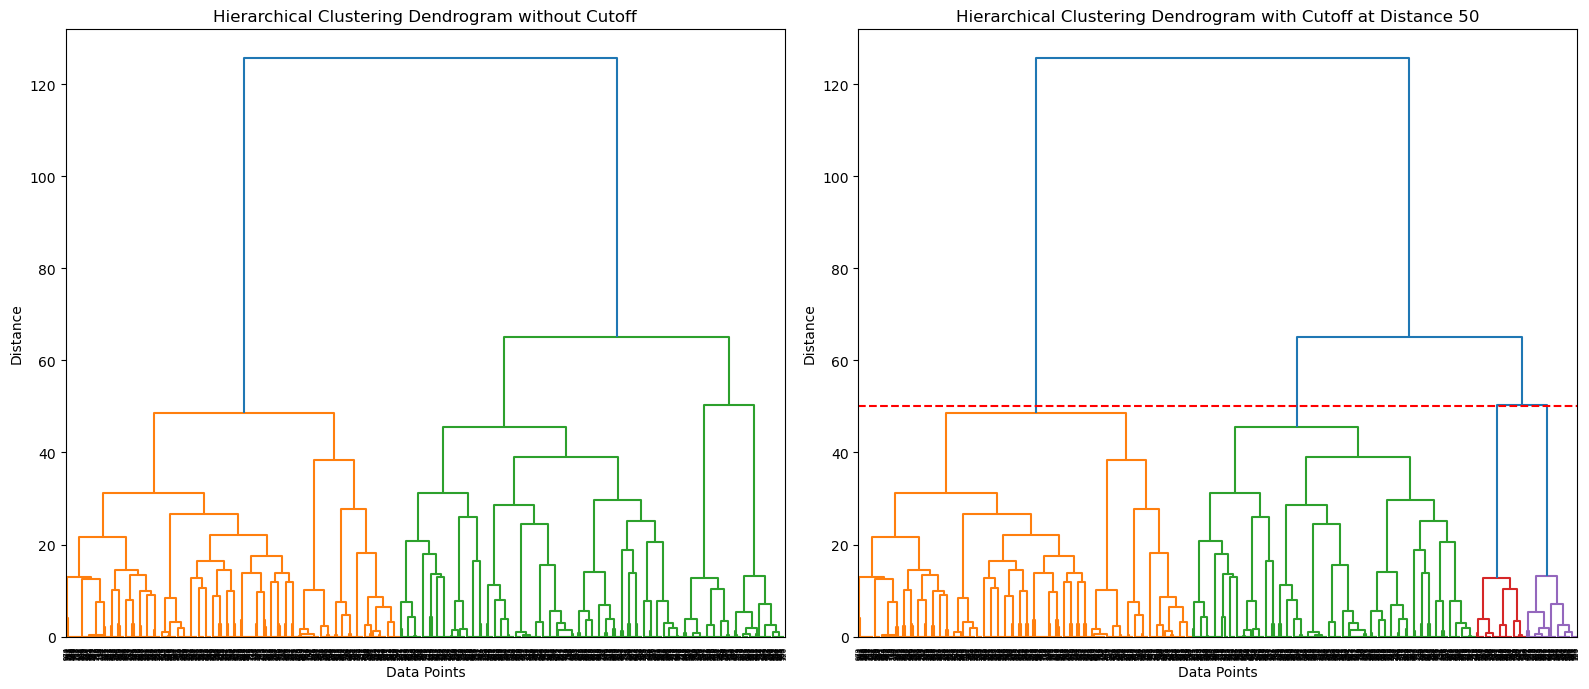

In [172]:
linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(16, 7))


plt.subplot(1, 2, 1)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram without Cutoff')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(linkage_matrix, color_threshold=50)
plt.axhline(y=50, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram with Cutoff at Distance 50')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

The code above visualizes the hierarchical clustering structure using two dendrograms. The cutoff distance at around 50 creates four separate clusters. This diagram helps understand how data points are grouped based on similarity at different levels, providing insight into other possible cluster separations.

## Applying PCA

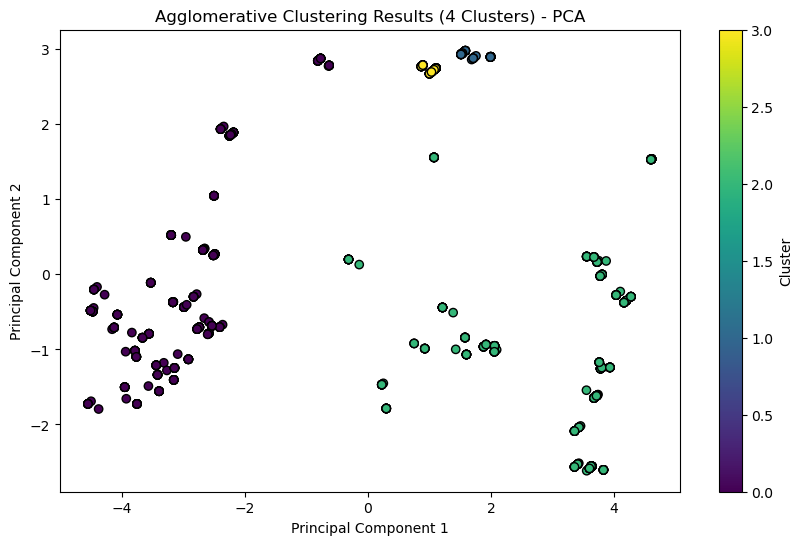

Explained variance by each component: [0.39580565 0.11740061]


In [173]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=final_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title("Agglomerative Clustering Results (4 Clusters) - PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()
print("Explained variance by each component:", pca.explained_variance_ratio_)

The code above uses PCA to reduce the data to two dimensions for easier viewing. The scatter plot shows the four clusters identified by Agglomerative Clustering. Each color represents a cluster, helping us see how they are separated. The explained variance shows how much info each component retains. which when added together is about 51% which shows that the plot provides half meaningful view of cluster assignment 

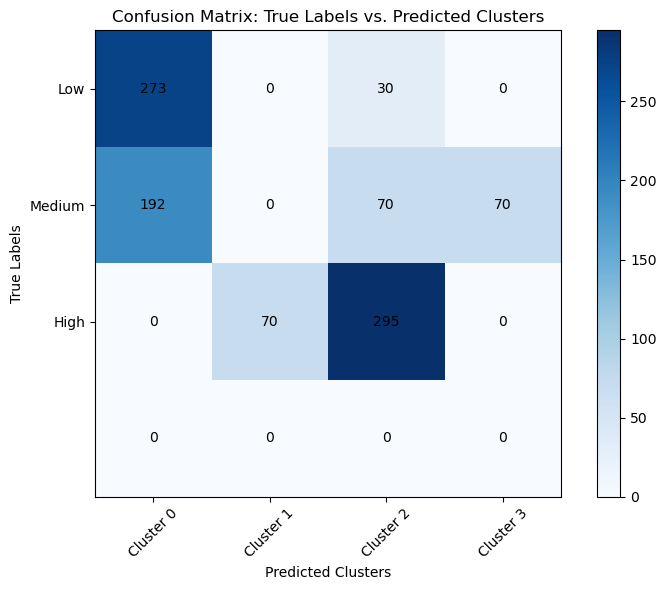

In [174]:
label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
true_labels_mapped = true_labels.map(label_mapping)
cm = confusion_matrix(true_labels_mapped, final_labels)
cluster_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
true_class_labels = ['Low', 'Medium', 'High']
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs. Predicted Clusters")
plt.colorbar()
plt.xticks(np.arange(optimal_clusters), cluster_labels, rotation=45)
plt.yticks(np.arange(len(true_class_labels)), true_class_labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


The confusion matrix shows how each predicted cluster matches the original categories: Low, Medium, and High (which was removed for clustering). Cluster 0 mostly contains Low cases, and Cluster 2 mostly captures High cases. Medium cases are spread across multiple clusters. This chart helps us see if clustering can act like an unsperivsed classification tool by comparing clusters with actual categories. The results show a partial match however it is not a definitive metric 

In [73]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA

# Define the path to the dataset and subdirectories
base_path = 'Z:\\coursework\\dataset\\lung_images\\Training cases'
case_types = ['Benign cases', 'Malignant cases', 'Normal cases']
true_labels = []  # Store true labels for evaluation
images = []       # Store image data
sample_images = {}  # Dictionary to store a sample of processed images

# Step 1: Load and preprocess images
for label, case_type in enumerate(case_types):
    folder_path = os.path.join(base_path, case_type)
    sample_images[case_type] = []  # Initialize list for each case type

    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize for consistency
            
            if i < 3:  # Save the first three images from each folder for display
                sample_images[case_type].append(img)
            
            images.append(img.flatten())       # Flatten to turn image into a feature vector
            true_labels.append(label)          # Label images based on folder (0 for Benign, 1 for Malignant, 2 for Normal)

# Step 2: Display sample processed images from each category
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
fig.suptitle("Sample Processed Images from Each Category")

for row, (case_type, imgs) in enumerate(sample_images.items()):
    for col, img in enumerate(imgs):
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].axis('off')
        # Add label below each image
        axes[row, col].set_title(case_type, fontsize=10, pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




KeyboardInterrupt: 

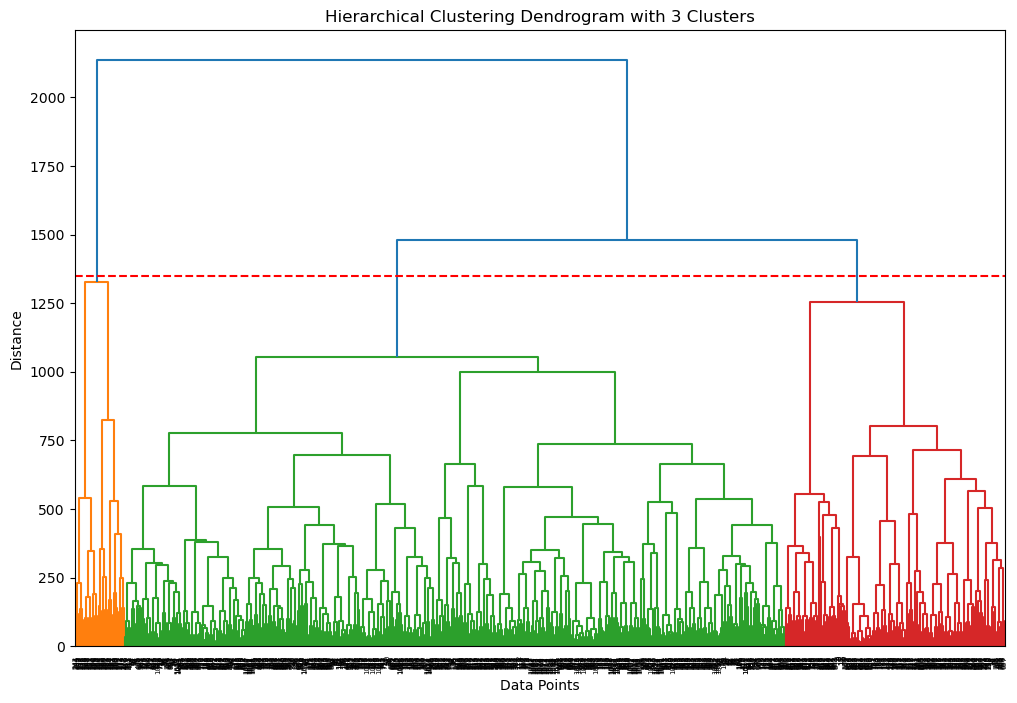

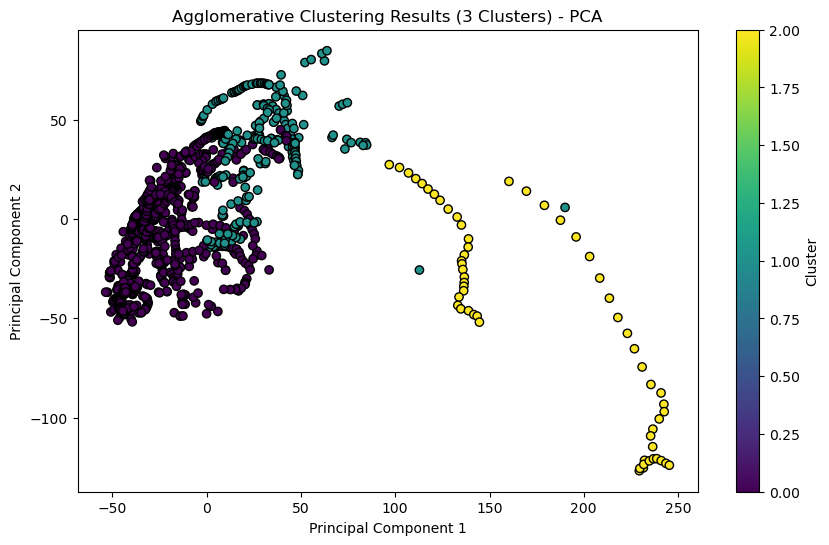

Explained variance by each component: [0.17025049 0.07310424]
Silhouette Score: 0.14698774759548988
Davies-Bouldin Index: 2.5684865325445974


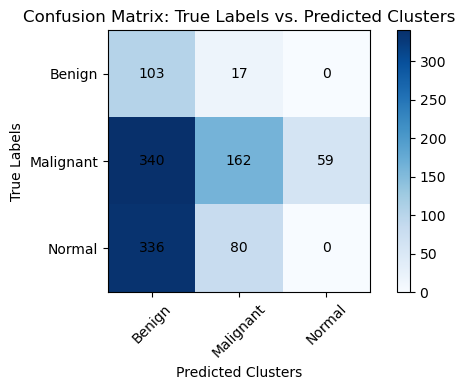

In [ ]:
# Step 3: Create a DataFrame and standardize features
df_images = pd.DataFrame(images)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_images)

# Step 4: Apply Agglomerative Clustering for 3 clusters
linkage_matrix = linkage(df_scaled, method='ward')
cluster_labels = cut_tree(linkage_matrix, n_clusters=3).flatten()

# Add cluster labels to the original data
df_images['Cluster'] = cluster_labels

# Step 5: Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=1350)  # Adjust threshold if needed
plt.axhline(y=1350, color='r', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram with 3 Clusters')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Step 7: Apply PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title("Agglomerative Clustering Results (3 Clusters) - PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Print explained variance by each component
print("Explained variance by each component:", pca.explained_variance_ratio_)




# Silhouette and Davies-Bouldin Scores
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
db_score = davies_bouldin_score(df_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_score}')

# Visualize Confusion Matrix
# Step 6: Evaluate Clustering Performance
# Confusion matrix
cm = confusion_matrix(true_labels, cluster_labels)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix: True Labels vs. Predicted Clusters")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Benign', 'Malignant', 'Normal'], rotation=45)
plt.yticks(tick_marks, ['Benign', 'Malignant', 'Normal'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")

plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()
